In [7]:
import warnings
warnings.filterwarnings(action='once')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import spline
plt.rcParams.update({'font.size': 16})

In [2]:
log = pd.read_csv('simulation.csv')
log2 = pd.read_csv('simulation_low.csv')
log3 = pd.read_csv('simulation_3_cli.csv')

In [243]:
# For the first dataset

x = np.array(log['Iteration'])
x_smooth = np.linspace(x.min(), x.max(), 300)

client = spline(x, log['Client funds'], x_smooth)
router = spline(x, log['Router'], x_smooth)
gateway = spline(x, log['Gateway'], x_smooth)
reserve_account = spline(x, log['Reserve Account'], x_smooth)
traffic = spline(x, log['Client traffic'], x_smooth)

/home/sergio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


In [242]:
# For the second dataset

x2 = np.array(log2['Iteration'])
x_smooth2 = np.linspace(x2.min(), x2.max(), 300)

client2 = spline(x2, log2['Client funds'], x_smooth2)
router2 = spline(x2, log2['Router'], x_smooth2)
gateway2 = spline(x2, log2['Gateway'], x_smooth2)
reserve_account2 = spline(x2, log2['Reserve account'], x_smooth2)
traffic2 = spline(x2, log2['Client traffic'], x_smooth2)

/home/sergio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


In [312]:
# For the third dataset

x3 = np.array(log3['Iterations'])
x_smooth3 = np.linspace(x3.min(), x3.max(), 300)

client3 = spline(x3, log3['Clients funds aggregate'], x_smooth3)
router3 = spline(x3, log3['Router'], x_smooth3)
gateway3 = spline(x3, log3['Gateway'], x_smooth3)
reserve_account3 = spline(x3, log3['Reserve account'], x_smooth3)
traffic3 = spline(x3, log3['Clients traffic aggregate'], x_smooth3)

/home/sergio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


NameError: name 'x' is not defined

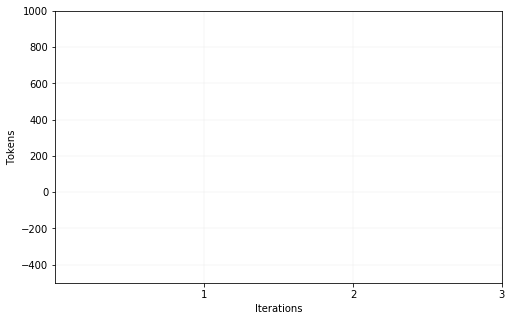

In [3]:
# Axis for the tokens
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('Iterations')
ax.set_ylabel('Tokens', color='k')
ax.grid(linewidth=0.1)
ax.set_ylim(-500, 1000)
ax.set_xticks([1,2,3])

lns = ax.plot(x, log2['Client funds'], '^-', lw=2, color='r', label='Client funds')
lns += ax.plot(x, log2['Router'], 'D-',lw=1, color='g', label='Router')
lns += ax.plot(x, log2['Gateway'], '-.',lw=2, color='m', label='Gateway')
lns += ax.plot(x, log2['Reserve account'], 'x-',lw=1, color='k', label='Reserve account')

# Axis for the forwarded bytes
ax2 = ax.twinx()
ax2.set_ylabel('Forwarded bytes', color='b')
ax2.set_ylim(-500, 1000)

lns += ax2.plot(x, log2['Client traffic'], 'o--', lw=1, color='b', label='Client traffic')


labs = [l.get_label() for l in lns]
#ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1.2) , ncol=5)
ax.legend(lns, labs, loc='upper center', ncol=2)

# Plot

plt.tight_layout()
plt.savefig('value_flow_straight_lines.pdf', format='pdf', dpi=300,  bbox_inches='tight')

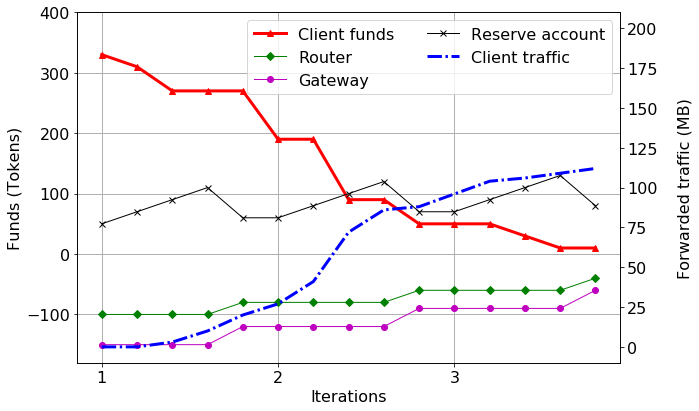

In [14]:
# Axis for the tokens
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('Iterations')
ax.set_ylabel('Funds (Tokens)', color='k')
ax.grid(linewidth=1, which='both')
ax.set_ylim(-180, 400)
ax.set_xticks([1,2,3])

lns = ax.plot(log3['Iterations'], log3['Clients funds aggregate'], '^-', lw=3, color='r', label='Client funds')
lns += ax.plot(log3['Iterations'], log3['Router'], 'D-',lw=1, color='g', label='Router')
lns += ax.plot(log3['Iterations'], log3['Gateway'], 'o-',lw=1, color='m', label='Gateway')
lns += ax.plot(log3['Iterations'], log3['Reserve account'], 'x-',lw=1, color='k', label='Reserve account')

# Axis for the forwarded bytes
ax2 = ax.twinx()
ax2.set_ylabel('Forwarded traffic (MB)', color='k', labelpad=20)
ax2.set_ylim(-10, 210)

lns += ax2.plot(log3['Iterations'], log3['Clients traffic aggregate'], '-.', lw=3, color='b', label='Client traffic')


labs = [l.get_label() for l in lns]
#ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1.2) , ncol=5)
ax.legend(lns, labs, loc='upper right', ncol=2)

# Plot

plt.tight_layout()
plt.savefig('value_flow_aggregate.pdf', format='pdf', dpi=300,  bbox_inches='tight')

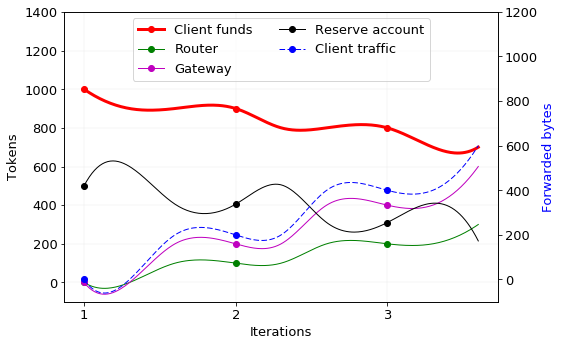

In [210]:
# Axis for the tokens
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('Iterations')
ax.set_ylabel('Tokens', color='k')
ax.grid(linewidth=0.1)
ax.set_xticks([1,2,3])
ax.set_ylim(-100, 1400)
datapoints = 115

lns = ax.plot(x_smooth, client, '-o', markevery=datapoints, lw=3, color='r', label='Client funds')
lns += ax.plot(x_smooth, router, '-o', markevery=datapoints, lw=1, color='g', label='Router')
lns += ax.plot(x_smooth, gateway, '-o', markevery=datapoints, lw=1, color='m', label='Gateway')
lns += ax.plot(x_smooth, reserve_account, '-o', markevery=datapoints, lw=1, color='k', label='Reserve account')

# Axis for the forwarded bytes
ax2 = ax.twinx()
ax2.set_ylabel('Forwarded bytes', color='b')
ax2.set_ylim(-100, 1200)

lns += ax2.plot(x_smooth, traffic, '--o', markevery=datapoints, lw=1, color='b', label='Client traffic')


labs = [l.get_label() for l in lns]
#ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1.2) , ncol=5)
ax.legend(lns, labs, loc='upper center', ncol=2)


# Plot

plt.tight_layout()
plt.savefig('value_flow.pdf', format='pdf', dpi=300, bbox_inches='tight')

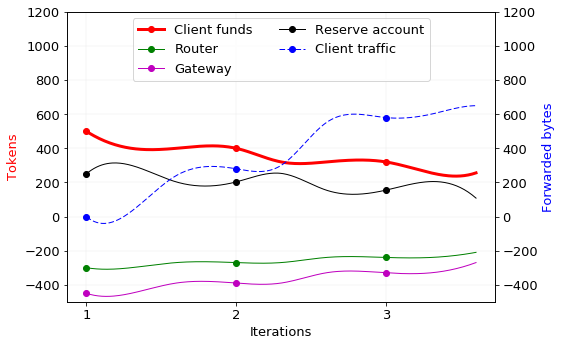

In [212]:
# Axis for the tokens
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('Iterations')
ax.set_ylabel('Tokens', color='r')
ax.set_ylim(-500, 1200)
ax.grid(linewidth=0.1)
ax.set_xticks([1,2,3])
datapoints = 115

lns = ax.plot(x_smooth2, client2, '-o', lw=3, markevery=datapoints, color='r', label='Client funds')
lns += ax.plot(x_smooth2, router2, '-o',lw=1, markevery=datapoints, color='g', label='Router')
lns += ax.plot(x_smooth2, gateway2, '-o',lw=1, markevery=datapoints, color='m', label='Gateway')
lns += ax.plot(x_smooth2, reserve_account2, '-o',lw=1, markevery=datapoints, color='k', label='Reserve account')

# Axis for the forwarded bytes
ax2 = ax.twinx()
ax2.set_ylim(-500, 1200)
ax2.set_ylabel('Forwarded bytes', color='b')

lns += ax2.plot(x_smooth2, traffic2, '--o', lw=1, markevery=datapoints, color='b', label='Client traffic')


labs = [l.get_label() for l in lns]
#ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5)
ax.legend(lns, labs, loc='upper center', ncol=2)



# Plot

plt.tight_layout()
#plt.savefig('value_flow_leandro.pdf', format='pdf', dpi=300, bbox_inches='tight')